<p style="text-align:center; font-size:155%;color:red;"><strong>TEXT CLASSIFICATION USING CONSUMER DATASET</strong></p>



<p style="text-align:center; font-size:155%"><strong>UTHESH GANAPATHY E</strong></p>


## STEP 1 : EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [1]:
# IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# LOAD THE CONSUMER COMPLAINT DATASET

Data = pd.read_csv('C:/Users/raki4/Downloads/CONSUMER/complaints.csv')

In [3]:
# DATA HEAD

Data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33009,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523056
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",MI,48234,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523057
2,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",GA,30034,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446803
3,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CO,80249,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446804
4,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051247,2015-02-21,Credit card,NaN,Sale of account,NaN,NaN,NaN,JPMORGAN CHASE & CO.,AL,36695,NaN,NaN,Web,2015-02-21,Closed with explanation,Yes,Yes,1250605
4051248,2015-07-19,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",IL,60614,NaN,Consent not provided,Web,2015-07-19,Closed with explanation,Yes,No,1473577
4051249,2022-06-16,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,NaN,Mr. Cooper Group Inc.,IA,52205,NaN,NaN,Referral,2022-06-17,Closed with explanation,Yes,NaN,5683655
4051250,2022-04-26,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,V and H Portfolio,SC,29624,NaN,Consent not provided,Web,2022-04-26,Closed with non-monetary relief,Yes,NaN,5495755


In [4]:
# COLUMNS DATATYPE

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051252 entries, 0 to 4051251
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 556.

In [5]:
# SHAPE OF THE DATA

Data.shape

(4051252, 18)

In [6]:
# SELECT ONLY THE 'PRODUCT' AND 'CONSUMER COMPLAINT NARRATIVE' COLUMNS FOR TEXT CLASSIFICATION

Selected = Data[['Product', 'Consumer complaint narrative']]

In [7]:
# SELECT ONLY THE NON NAN ITEMS IN BOTH 'PRODUCT' AND 'CONSUMER COMPLAINT NARRATIVE' COLUMNS 

Particular = Selected[pd.notnull(Selected['Consumer complaint narrative'])]
New_Data = Particular.copy()

In [8]:
New_Data

,Product,Consumer complaint narrative
14,"Credit reporting, credit repair services, or o...",I am a victim of identity theft please remove ...
17,"Credit reporting, credit repair services, or o...",Please remove this inquiry from my credit repo...
18,"Credit reporting, credit repair services, or o...",The following inquiries appear on my account. ...
19,"Credit reporting, credit repair services, or o...",I've found that my credit report has erroneous...
24,"Credit reporting, credit repair services, or o...","Synchrony, Bank discount tire had Called me fo..."
...,...,...
4051021,Debt collection,"I XXXX XXXX am a person, non-adverse, non-bell..."
4051049,Checking or savings account,"On XXXX XX/XX/2022, my spouse and I - who move..."
4051052,Debt collection,Original Creditor - XXXX XXXX ; XXXX XXXX - US...
4051185,"Money transfer, virtual currency, or money ser...","On XX/XX/22, I contracted with XXXX XXXX ( DBA..."


## STEP 2 : TEXT PREPROCESSING

In [9]:
# CHECK THE UNIQUE ITEMS PRESENT IN COLUMN 'PRODUCT'

pd.DataFrame(New_Data.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Mortgage'],
       ['Money transfer, virtual currency, or money service'],
       ['Checking or savings account'],
       ['Credit card or prepaid card'],
       ['Vehicle loan or lease'],
       ['Debt collection'],
       ['Payday loan, title loan, or personal loan'],
       ['Student loan'],
       ['Credit card'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Consumer Loan'],
       ['Credit reporting or other personal consumer reports'],
       ['Payday loan, title loan, personal loan, or advance loan'],
       ['Money transfers'],
       ['Payday loan'],
       ['Other financial service'],
       ['Prepaid card'],
       ['Virtual currency'],
       ['Debt or credit management']], dtype=object)

In [10]:
# USING ONLY 20000 SAMPLES FOR TRAINING AND TESTING

Final_Data = New_Data.sample(20000, random_state= 0).copy()

In [11]:
# RENAME THE UNIQUE ITEMS

Final_Data.replace({
    'Credit reporting or other personal consumer reports': 'Credit Reporting',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Repair',
    'Debt collection': 'Debt Collection',
    'Mortgage': 'Mortgage',
    'Checking or savings account': 'Savings Account',
    'Credit card or prepaid card': 'Credit Card',
    'Payday loan, title loan, or personal loan': 'Payday Loan',
    'Student loan': 'Student Loan',
    'Vehicle loan or lease': 'Vehicle Loan',
    'Money transfer, virtual currency, or money service': 'Money Transfer',
    'Debt or credit management': 'Credit Management',
    'Bank account or service': 'Bank Account',
    'Payday loan, title loan, personal loan, or advance loan': 'Advance Loan',
    'Repair or Credit reporting': 'Credit Reporting Repair',
    'title loan,Payday ,Personal loan': 'Title Loan',
    'Consumer Loan': 'Consumer Loan',
    'Money transfers': 'Money Transfers',
    'Other financial service': 'Other Financial Service'}, inplace= True)

In [12]:
pd.DataFrame(Final_Data.Product.unique()).values

array([['Debt Collection'],
       ['Credit Repair'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Credit Card'],
       ['Bank Account'],
       ['Credit card'],
       ['Vehicle Loan'],
       ['Payday Loan'],
       ['Savings Account'],
       ['Money Transfer'],
       ['Consumer Loan'],
       ['Prepaid card'],
       ['Student Loan'],
       ['Money Transfers'],
       ['Payday loan'],
       ['Credit Management'],
       ['Virtual currency'],
       ['Credit Reporting'],
       ['Other Financial Service']], dtype=object)

In [13]:
# ADD THE NEW COLUMN CALLED 'CATEGORY ID'

Final_Data['category_id'] = Final_Data['Product'].factorize()[0]

In [14]:
# DROP THE NULL VALUES IN 'PRODUCT' AND 'CATEGORY ID' COLUMNS

Category_id = Final_Data[['Product', 'category_id']].drop_duplicates()

In [15]:
Category_id

,Product,category_id
934909,Debt Collection,0
555825,Credit Repair,1
1936223,Mortgage,2
2433871,Credit reporting,3
513091,Credit Card,4
1480527,Bank Account,5
2522250,Credit card,6
2904225,Vehicle Loan,7
2774053,Payday Loan,8
1089803,Savings Account,9


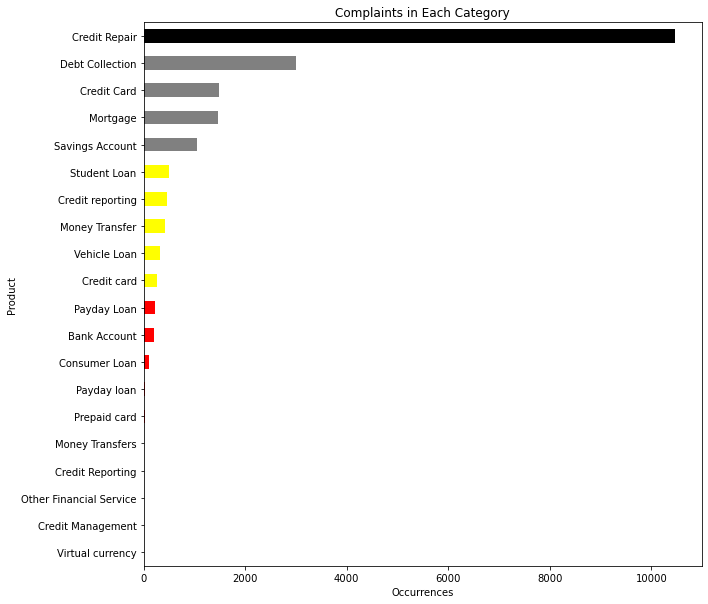

In [16]:
# PLOT THE NUMBER OF COMPLAINTS IN EACH CATEGORY OF PRODUCTS

import matplotlib.pyplot as plt
Colors = ['black', 'black', 'black', 'black', 'black', 'red', 'red', 'red', 'red', 'red',
          'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'grey', 'grey', 'grey', 'grey']
category_counts = Final_Data.groupby('Product')['Consumer complaint narrative'].count().sort_values()
fig, ax = plt.subplots(figsize=(10, 10))
category_counts.plot.barh(ylim=0, color=Colors, title='Complaints in Each Category', ax=ax)
plt.xlabel('Occurrences', fontsize=10)
plt.show()


## STEP 3 : SELECTION OF MULTICLASSIFICATION MODEL

In [17]:
# VECTORIZE THE TEXT DATA (TF-IDF)

def preprocess_text(text):
    # CONVERT TO LOWERCASE
    text = text.lower()
    
    # REMOVE SPECIAL CHARACTER
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # TOKENIZATION AND STOP WORDS
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# APPLY THE TEXT PREPROCESSING TO 'CONSUMER COMPLAINT NARRATIVE' COLUMN
Final_Data['cleaned_complaint'] = Final_Data['Consumer complaint narrative'].apply(preprocess_text)
tfidf = TfidfVectorizer(max_features=12973, stop_words='english')
Features = tfidf.fit_transform(Final_Data['cleaned_complaint']).toarray()
Labels = Final_Data.category_id

In [18]:
# SPLIT THE DATASET

X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

In [19]:
# STORE 'CATEGORY ID' IN A DICTIONARY

Category = dict(Final_Data[['category_id', 'Product']].values)
Category

{0: 'Debt Collection',
 1: 'Credit Repair',
 2: 'Mortgage',
 3: 'Credit reporting',
 4: 'Credit Card',
 5: 'Bank Account',
 6: 'Credit card',
 7: 'Vehicle Loan',
 8: 'Payday Loan',
 9: 'Savings Account',
 10: 'Money Transfer',
 11: 'Consumer Loan',
 12: 'Prepaid card',
 13: 'Student Loan',
 14: 'Money Transfers',
 15: 'Payday loan',
 16: 'Credit Management',
 17: 'Virtual currency',
 18: 'Credit Reporting',
 19: 'Other Financial Service'}

## MODEL1: <span style="color:red">MULTINOMIAL NAIVE BAYES</span>


In [20]:
# MULTINOMINAL NAIVE BAYE'S MODEL

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

## EVALUATION OF MODEL PERFORMANCE

In [21]:
# EVALUATE THE MODEL PERFORMANCE

y_pred1 = clf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
report1 = classification_report(y_test, y_pred1, zero_division=0)

## CLASSIFICATION REPORT

In [22]:
# ACCURACY, CLASSIFICATION REPORT, CONFUSION MATRIX

print(f'Accuracy: {accuracy1}')
print("\n")
print(report1)

Accuracy: 0.68425


              precision    recall  f1-score   support

           0       0.73      0.42      0.53       572
           1       0.67      0.99      0.80      2154
           2       0.86      0.72      0.79       287
           3       0.00      0.00      0.00        83
           4       0.64      0.30      0.40       298
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        69
           8       0.00      0.00      0.00        41
           9       0.71      0.32      0.44       187
          10       0.00      0.00      0.00        86
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00         4
          13       1.00      0.06      0.11        90
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         1

    ac

## CONFUSION MATRIX

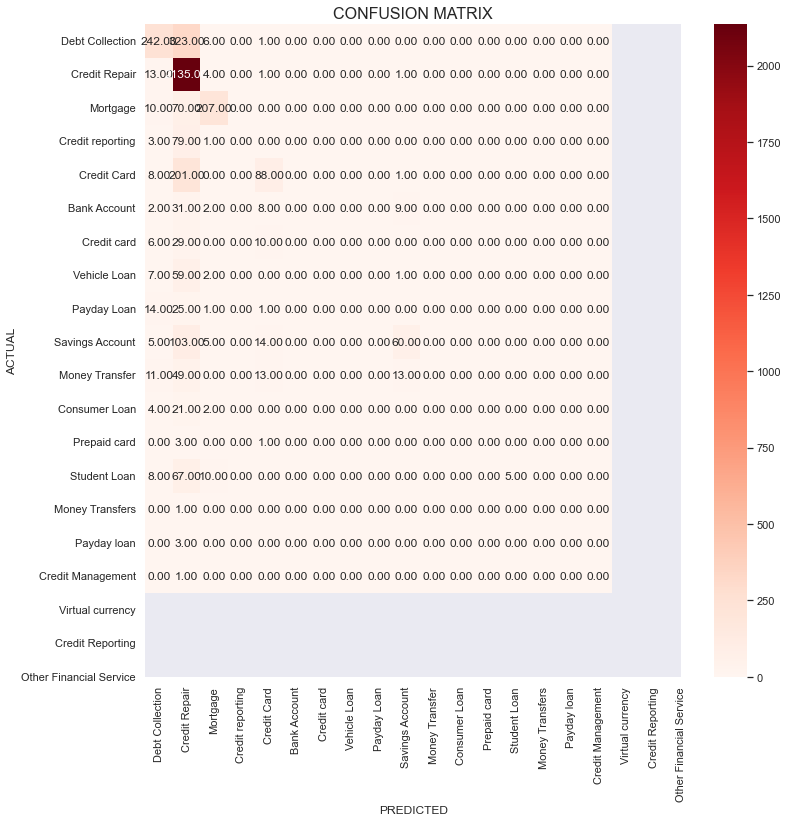

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
conf_mat1 = confusion_matrix(y_test, y_pred1)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(conf_mat1, annot=True, cmap="Reds", fmt='.2f',xticklabels=Category_id.Product.values,
            yticklabels=Category_id.Product.values)
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.title("CONFUSION MATRIX", size=16)
plt.show()


## PREDICTION

In [24]:
# PREDICTION

Complaint = "I have an issue with my credit card statement."
Complaint_ID = (clf.predict(tfidf.transform([Complaint])))
print("THE COMPLAINT CATEGORY IS:", Category[Complaint_ID[0]])

THE COMPLAINT CATEGORY IS: Credit Repair


## MODEL2: <span style="color:red">LOGISTIC REGRESSION</span>

In [25]:
# LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=5000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

## EVALUATION OF MODEL PERFORMANCE

In [26]:
# EVALUATE THE MODEL PERFORMANCE

y_pred2 = log.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
report2 = classification_report(y_test, y_pred2,zero_division=0)

## CLASSIFICATION REPORT

In [27]:
# ACCURACY, CLASSIFICATION REPORT, CONFUSION MATRIX

print(f'Accuracy: {accuracy2}')
print("\n")
print(report2)

Accuracy: 0.797


              precision    recall  f1-score   support

           0       0.76      0.72      0.74       572
           1       0.84      0.95      0.89      2154
           2       0.90      0.90      0.90       287
           3       0.00      0.00      0.00        83
           4       0.65      0.73      0.69       298
           5       1.00      0.02      0.04        52
           6       0.00      0.00      0.00        45
           7       0.61      0.36      0.45        69
           8       0.80      0.10      0.17        41
           9       0.59      0.72      0.65       187
          10       0.72      0.36      0.48        86
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00         4
          13       0.88      0.73      0.80        90
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         1

    accu

## CONFUSION MATRIX

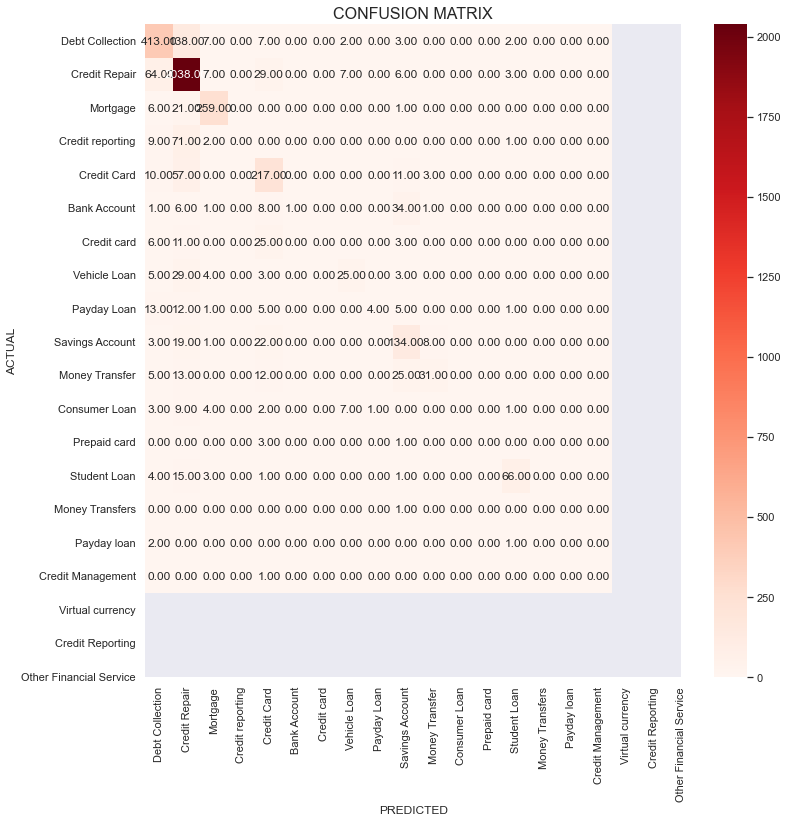

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
conf_mat2 = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(conf_mat2, annot=True, cmap="Reds", fmt='.2f',xticklabels=Category_id.Product.values, yticklabels=Category_id.Product.values)
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.title("CONFUSION MATRIX", size=16)
plt.show()


## PREDICTION

In [29]:
Complaint = "My mortgage account for them was under forbear"
Complaint_ID = (log.predict(tfidf.transform([Complaint])))
print("THE COMPLAINT CATEGORY IS:", Category[Complaint_ID[0]])

THE COMPLAINT CATEGORY IS: Mortgage


## MODEL3: <span style="color:red">RANDOM FOREST CLASSIFIER</span>

In [30]:
# RANDOM FOREST CLASSIFIER MODEL

from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=100, random_state=42)
ran.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## EVALUATION OF MODEL PERFORMANCE

In [31]:
# EVALUATE THE MODEL PERFORMANCE

y_pred3 = ran.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
report3 = classification_report(y_test, y_pred3,zero_division=0)

## CLASSIFICATION REPORT

In [32]:
# ACCURACY, CLASSIFICATION REPORT, CONFUSION MATRIX

print(f'Accuracy: {accuracy3}')
print("\n")
print(report3)

Accuracy: 0.75925


              precision    recall  f1-score   support

           0       0.77      0.64      0.70       572
           1       0.78      0.97      0.86      2154
           2       0.80      0.85      0.82       287
           3       0.00      0.00      0.00        83
           4       0.65      0.53      0.59       298
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        45
           7       0.50      0.01      0.03        69
           8       0.33      0.02      0.05        41
           9       0.53      0.65      0.58       187
          10       0.78      0.08      0.15        86
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00         4
          13       0.90      0.59      0.71        90
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         1

    ac

## CONFUSION MATRIX

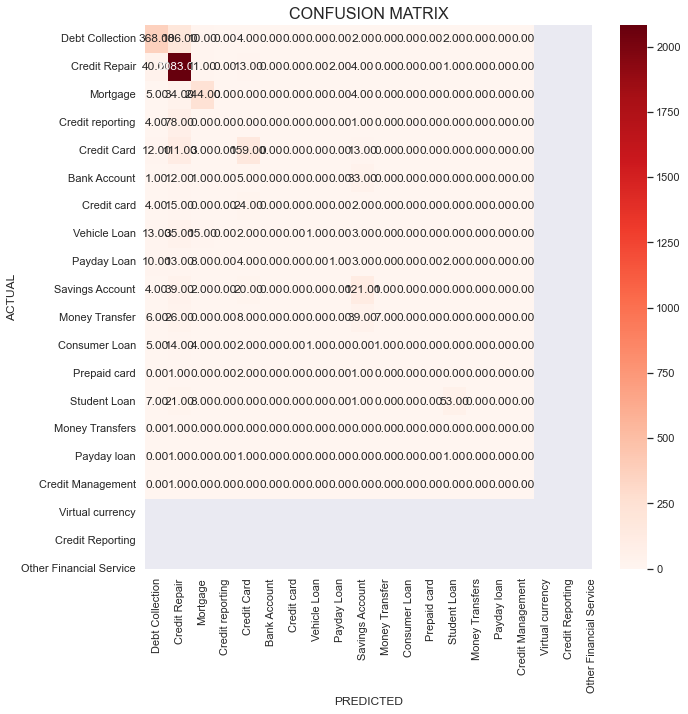

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
conf_mat3 = confusion_matrix(y_test, y_pred3)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat3, annot=True, cmap="Reds", fmt='.2f',xticklabels=Category_id.Product.values,
            yticklabels=Category_id.Product.values)
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.title("CONFUSION MATRIX", size=16)
plt.show()


## PREDICTION

In [34]:
Complaint = "I opened a Citigold checking account with a significant deposit and high expectations for the premium banking services it offers."
Complaint_ID = (ran.predict(tfidf.transform([Complaint])))
print("THE COMPLAINT CATEGORY IS:", Category[Complaint_ID[0]])

THE COMPLAINT CATEGORY IS: Savings Account


## MODEL4: <span style="color:red">LINEAR SUPPORT VECTOR CLASSIFIER</span>

In [35]:
# LINEAR SVC MODEL

from sklearn.svm import LinearSVC
lin = LinearSVC()
lin.fit(X_train, y_train)

LinearSVC()

## EVALUATION OF MODEL PERFORMANCE

In [36]:
# EVALUATE THE MODEL PERFORMANCE

y_pred4 = lin.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
report4 = classification_report(y_test, y_pred4,zero_division=0)

## CLASSIFICATION REPORT

In [37]:
# ACCURACY, CLASSIFICATION REPORT, CONFUSION MATRIX

print(f'Accuracy: {accuracy4}')
print("\n")
print(report4)

Accuracy: 0.7985


              precision    recall  f1-score   support

           0       0.72      0.73      0.72       572
           1       0.86      0.93      0.90      2154
           2       0.88      0.91      0.90       287
           3       0.18      0.02      0.04        83
           4       0.67      0.71      0.69       298
           5       0.40      0.04      0.07        52
           6       0.33      0.07      0.11        45
           7       0.57      0.43      0.49        69
           8       0.50      0.22      0.31        41
           9       0.59      0.71      0.65       187
          10       0.67      0.51      0.58        86
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00         4
          13       0.85      0.77      0.81        90
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         1

    acc

## CONFUSION MATRIX

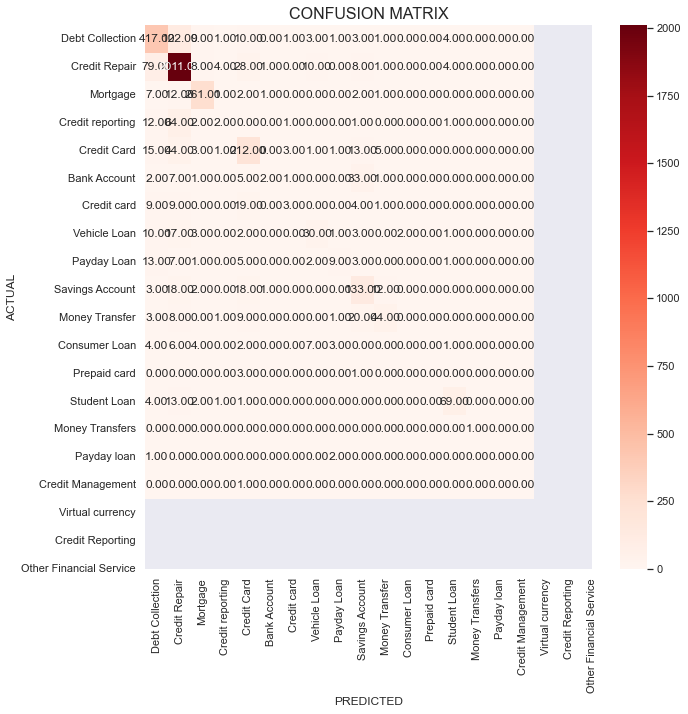

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
conf_mat4 = confusion_matrix(y_test, y_pred4)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat4, annot=True, cmap="Reds", fmt='.2f',xticklabels=Category_id.Product.values, yticklabels=Category_id.Product.values)
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.title("CONFUSION MATRIX", size=16)
plt.show()

## PREDICTION

In [39]:
Complaint = "Few days ago,i have been harassed by Navient. I have already faxed the paperwork providing them with everything they wanted."
Complaint_ID = (lin.predict(tfidf.transform([Complaint])))
print("THE COMPLAINT CATEGORY IS:", Category[Complaint_ID[0]])

THE COMPLAINT CATEGORY IS: Student Loan


## STEP 4 : COMPARISON OF MODEL PERFORMANCE

In [40]:
Accuracies = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100]
Model_names = ["MULTINOMINAL NAIVE BAYE'S", "LOGISTIC REGRESSION", "RANDOM FOREST CLASSIFIER", "LINEAR SVC"]


In [41]:
# CREATE A DATAFRAME TO STORE ALL THE ACCURACIES IN 1 DATAFRAME

Acc = pd.DataFrame({'MODELS': Model_names, 'ACCURACY': Accuracies})
print(Acc)

                      MODELS  ACCURACY
0  MULTINOMINAL NAIVE BAYE'S    68.425
1        LOGISTIC REGRESSION    79.700
2   RANDOM FOREST CLASSIFIER    75.925
3                 LINEAR SVC    79.850


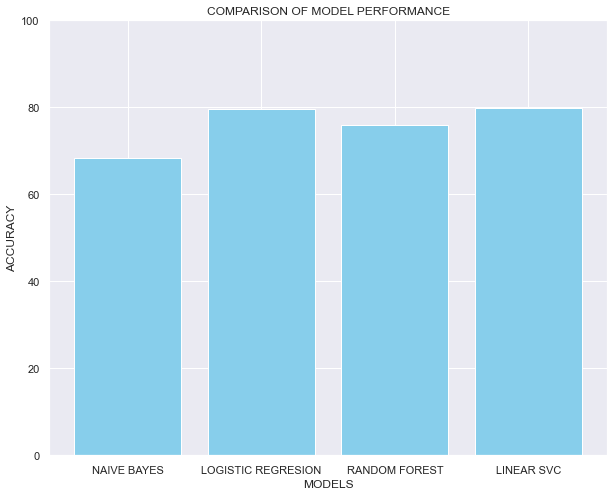

In [42]:
# BAR CHART TO VISUALIZE EACH MODEL'S ACCURACY

import matplotlib.pyplot as plt
Accuracies = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100]
Model_names = ["NAIVE BAYES", "LOGISTIC REGRESION", "RANDOM FOREST", "LINEAR SVC"]

plt.figure(figsize=(10, 8))
plt.bar(Model_names, Accuracies, color='skyblue')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.title('COMPARISON OF MODEL PERFORMANCE')
plt.ylim(0, 100)
plt.show()

## STEP 5 : CONCLUSION

Based on the accuracy results we obtained for the different models used in text classification using the Consumer Complaint Dataset, here are some conclusions:

1. **Multinomial Naive Bayes**: This model achieved an accuracy of 68.425%. It demonstrates a notable improvement in accuracy compared to the previous evaluation.


2. **Logistic Regression**: The Logistic Regression model achieved an accuracy of 79.700%, making it one of the top-performing models in this comparison.


3. **Random Forest Classifier**: The Random Forest Classifier achieved an accuracy of 75.925%, which is also a strong performance.


4. **Linear SVC (Support Vector Classifier)**: The Linear SVC model performed impressively with the highest accuracy of 79.850%, tying with Logistic Regression for the top spot.